In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [8]:
df_path = Path('inspire_data_with_reference_fractions/inspire_data_with_reference_fractions.df')

In [9]:
inspire_data = pd.read_pickle(df_path)

In [10]:
inspire_data.describe()

,core_references_fraction_first_order,core_references_fraction_second_order,noncore_references_fraction_first_order,noncore_references_fraction_second_order,labels
count,186007.000000,186007.000000,186007.000000,186007.000000,186007.000000
mean,0.285720,0.301737,0.166185,0.176903,1.193208
std,0.365134,0.355366,0.226733,0.204956,0.770264
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.055556,0.084746,0.050633,0.088710,1.000000
75%,0.606061,0.649242,0.266667,0.299196,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


In [11]:
# Separate the target and the features
X = inspire_data[['core_references_fraction_first_order',
                     'noncore_references_fraction_first_order',
                     'core_references_fraction_second_order',
                     'noncore_references_fraction_second_order']]
y = inspire_data[['labels']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [16]:
clf = xgb.XGBClassifier(max_depth=7,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=500,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)

In [24]:
clf.fit(X_train, y_train)

/root/py36venv/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/py36venv/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=1, silent=True,
       subsample=1)

In [26]:
preds = clf.predict(X_test)

/root/py36venv/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Normalized confusion matrix
[[0.87547634 0.0043024  0.12022127]
 [0.05430725 0.84600747 0.09968528]
 [0.20819268 0.09555959 0.69624773]]


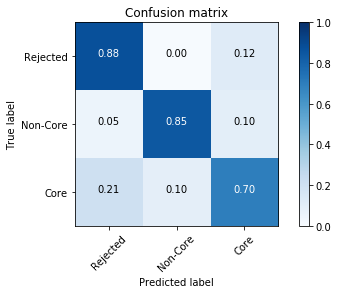

In [29]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import itertools

conf_mat = confusion_matrix(y_test, preds, labels = [0, 1, 2])

# funtion to plot confusion matrices, will be needed later

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
    else:
        print('Confusion matrix, without normalization')
        plt.imshow(cm, interpolation='nearest', cmap=cmap)

    print(cm)
    
    
    plt.title(title)
    plt.colorbar( )
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(conf_mat, ['Rejected', 'Non-Core', 'Core'], normalize=True)
plt.show()

In [44]:
from tpot import TPOTClassifier

In [ ]:
tpot = TPOTClassifier(generations=20, population_size=100, verbosity=3, n_jobs=-1)
tpot.fit(X_train, y_train)

30 operators have been imported by TPOT.


/root/py36venv/lib64/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
tpot.fitted_pipeline_

In [40]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFwe, f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer, PolynomialFeatures
from xgboost import XGBClassifier

imputer = Imputer(strategy="median")
imputer.fit(X_train)
training_features = imputer.transform(X_train)
testing_features = imputer.transform(X_test)

exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    SelectFwe(score_func=f_regression, alpha=0.023),
    XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, nthread=1, subsample=0.5)
)

exported_pipeline.fit(training_features, y_train)
results = exported_pipeline.predict(testing_features)

/root/py36venv/lib64/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/py36venv/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/py36venv/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/py36venv/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will resu

In [41]:
test_results = exported_pipeline.predict(X_test)

/root/py36venv/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Normalized confusion matrix
[[0.86969883 0.00381069 0.12649047]
 [0.05408768 0.84915465 0.09675767]
 [0.20618021 0.09568943 0.69813036]]


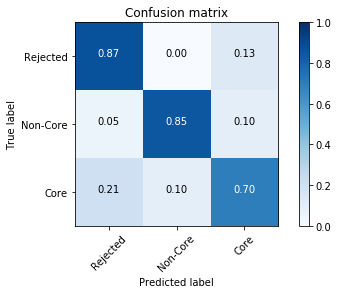

In [42]:
conf_mat = confusion_matrix(y_test, test_results, labels = [0, 1, 2])

plt.figure()
plot_confusion_matrix(conf_mat, ['Rejected', 'Non-Core', 'Core'], normalize=True)
plt.show()

In [43]:
test_results

array([0, 0, 0, ..., 1, 2, 0])